<a href="https://colab.research.google.com/github/ektaatomar/Topic-modeling-and-grid-search/blob/master/topicmodeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#to get english stop words from spacy
!pip install spacy && python -m spacy download en
!pip install mglearn
!pip install wordcloud
!pip install nltk
!pip install xlrd

In [0]:
#fetching file from google drive
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
file = 'gdrive/My Drive/blockchain_data.xlsx'

In [0]:
import pandas as pd #to read Excel files
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string #to remove punctuation and digits
import spacy



#creating the list of characters to be removed if present 
stopwords = list(ENGLISH_STOP_WORDS)
p = string.punctuation
d = string.digits
combined = p + d

#docs = [] #will contain text for all the companies
#company_names = [] #will contain our labels

#simple function to parse our text
def parse(txt):
    #convert everything to single case
    txt = txt.lower()
    #remove punctuation and digits
    table = str.maketrans(combined, len(combined) * " ")
    txt = txt.translate(table)
    #remove stopwords
    words = txt.split()
    cleaned_words = [w for w in words if w not in stopwords]
    cleaned_text = " ".join(cleaned_words)
    return cleaned_text


en_nlp = spacy.load('en')

#lemmentization
def normalization(txt):
    # tokenize document in spacy:
    doc_spacy = en_nlp(txt)
    # print lemmas found by spacy
    print("Lemmatization:")
    lemm_words=[token.lemma_ for token in doc_spacy]
    print(lemm_words)
    return lemm_words

In [0]:
df = pd.read_excel(file) #read excel file of abstracts
df['AB'].dropna(inplace = True) # removing missing values
doc=[]
'''
# getting all the abstracts in a list
for rows in df['AB']:
  doc.append(rows)
'''
  
# getting all the abstracts in a list
doc = list(df['AB'])
combined_abstracts = " ".join(doc)

cleaned_abstracts = parse(combined_abstracts)# parsing abstracts to remove stop words, punctuations and turn into simillar case
cleaned_abstracts= normalization(cleaned_abstracts) #lemmatization


In [0]:
len(cleaned_abstracts)
#len(doc)

88727

In [0]:
#importing countvectorizer and LDA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np  # to get the LDA components
import matplotlib.pyplot as plt
import mglearn

In [0]:
vectorizer = CountVectorizer(stop_words = 'english')
dtm = vectorizer.fit_transform(cleaned_abstracts)
num_topics = 25
multiplier = int(num_topics / 2)
lda100 = LatentDirichletAllocation(n_components=num_topics, learning_method="batch", max_iter=100, random_state=0)
document_topics100 = lda100.fit_transform(dtm)


In [0]:
document_topics100.shape

(88727, 25)

In [0]:
document_topics100

array([[0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.52, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [0.52, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02]])

In [0]:
#topics and their words
lda100.components_.shape

(25, 6605)

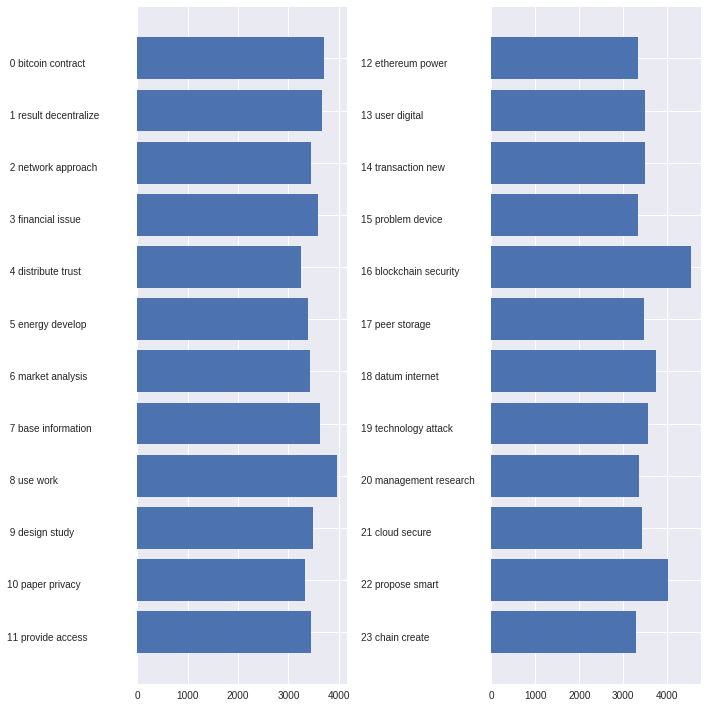

In [0]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vectorizer.get_feature_names())

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
num_top_words = 100

# two column bar chart:
for col in [0, 1]:
    start = col * multiplier
    end = (col + 1) * multiplier
    ax[col].barh(np.arange(multiplier), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(multiplier))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    #ax[col].set_xlim(0, 800)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()
plt.show()

In [0]:
#sorting = np.argsort(lda100.components_, axis=1)[:, ::-1][0:num_top_words]
#mglearn.tools.print_topics(topics=range(num_topics), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=20)

In [0]:
from sklearn import decomposition
num_topics = 25
num_top_words = 100
clf = decomposition.NMF(n_components = num_topics, random_state=1)
doctopic = clf.fit_transform(dtm) #Learn a NMF model for the data X and returns the transformed data.
topic_words = []
vocab = vectorizer.get_feature_names() 
for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words] #Returns the indices that would sort an array.
    topic_words.append([vocab[i] for i in word_idx])
    
#topic_words

In [0]:
#vectorizer.vocabulary_
text1 = list(cleaned_abstracts)
text =  ' '.join(text1)
text

In [0]:
from wordcloud import WordCloud
#text = list(vectorizer.vocabulary_)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

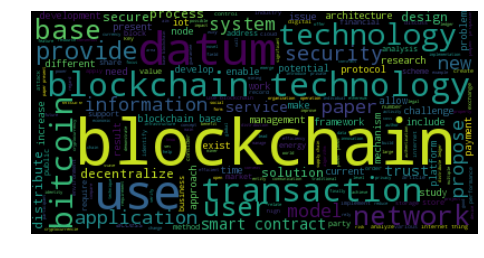

In [0]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
#import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

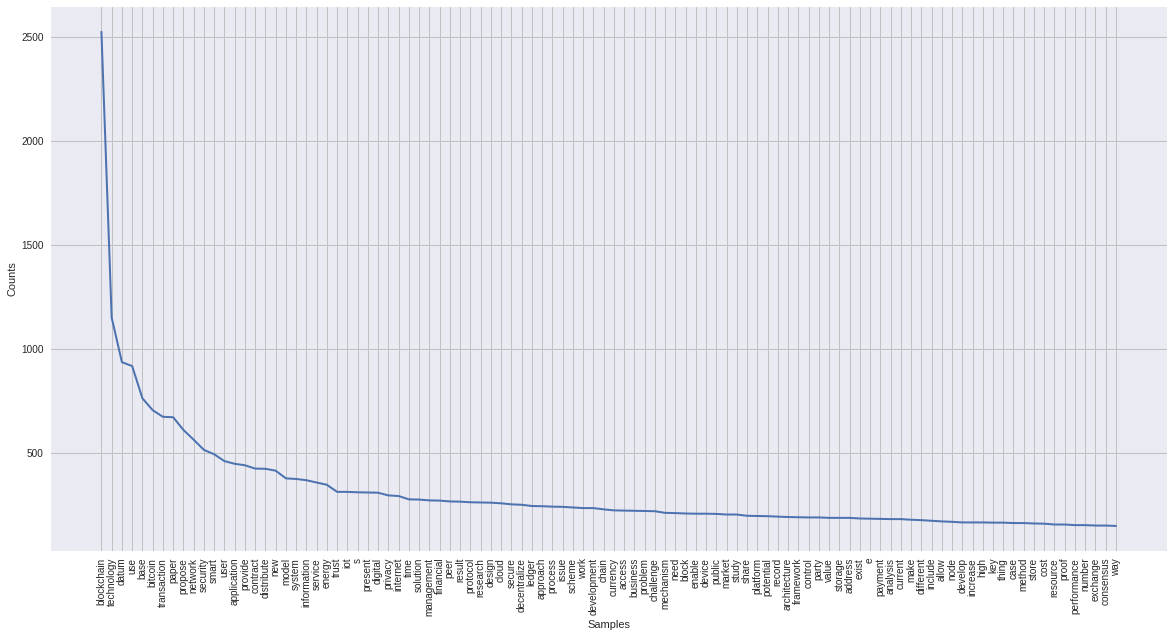

In [0]:
#wordcloud.to_file("gdrive/My Drive/blockchain_data/first_review.png")
words = nltk.word_tokenize(text)
#pass words to nltk.FreqDist
freq = nltk.FreqDist(words)
#plot the top 100 words
plt.figure(figsize=(20, 10)) 
freq.plot(100)



In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
lda = LatentDirichletAllocation()
model = GridSearchCV(lda, param_grid=search_params)
model.fit(dtm)

In [0]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10}
Best Log Likelihood Score:  -254378.28364299206


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


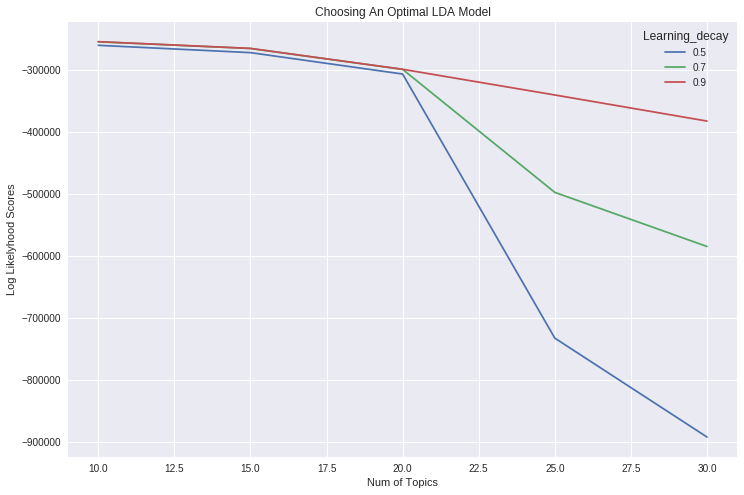

In [0]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing An Optimal LDA Model")
plt.xlabel("Num of Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning_decay', loc='best')
plt.show()